Shape of the dataset: (2468, 8)
Columns: ['Engine Size', 'Age of Vehicle', 'Speed', 'Road Type', 'Traffic Conditions', 'Temperature', 'Wind Speed', 'NOx Emissions']

Descriptive Statistics:
       Engine Size  Age of Vehicle        Speed  Temperature   Wind Speed  \
count  2468.000000      2468.00000  2468.000000  2468.000000  2468.000000   
mean      3.367308        14.65316    59.397236    14.984386    10.027462   
std       1.496960         8.63147    33.987588    14.622551     5.719109   
min       0.801253         0.00000     0.029435    -9.968876     0.003425   
25%       2.077646         7.00000    30.750918     2.121801     5.095876   
50%       3.361103        15.00000    58.546465    15.230850    10.042351   
75%       4.623753        22.00000    87.891463    27.745457    15.019182   
max       5.996622        29.00000   119.951806    39.991188    19.997502   

       NOx Emissions  
count    2468.000000  
mean        1.057315  
std         0.544578  
min         0.103816  
2

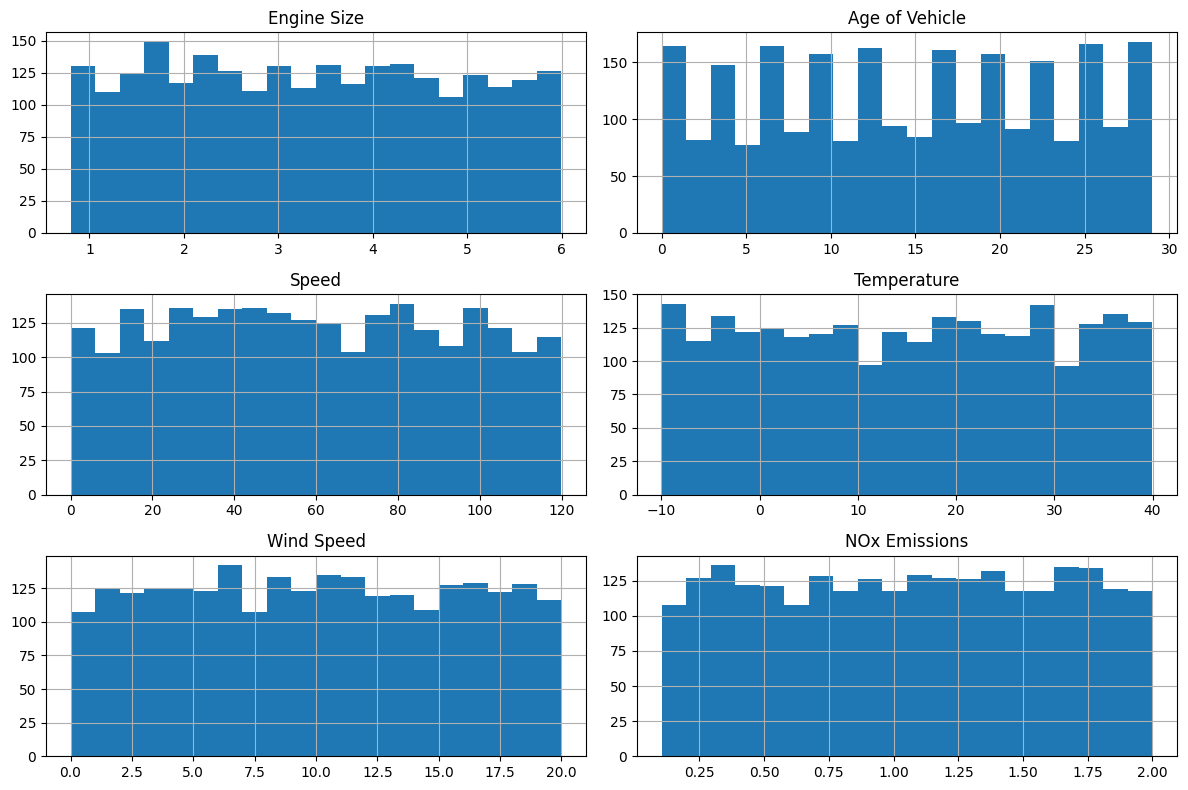

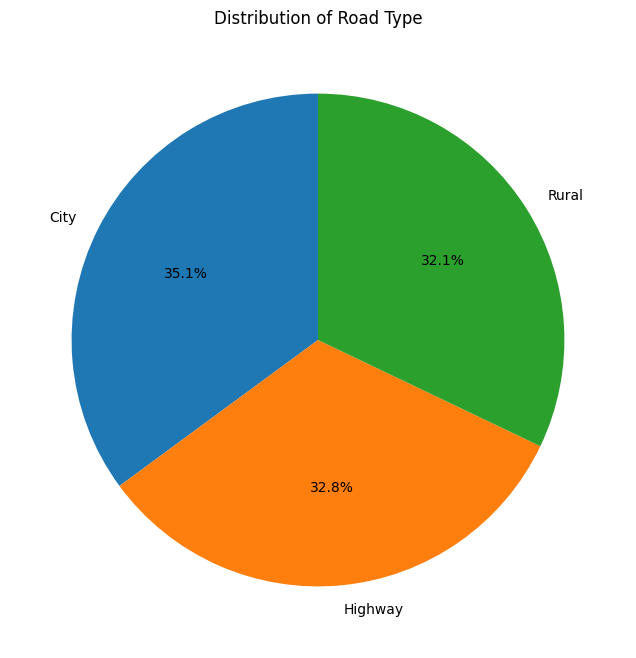

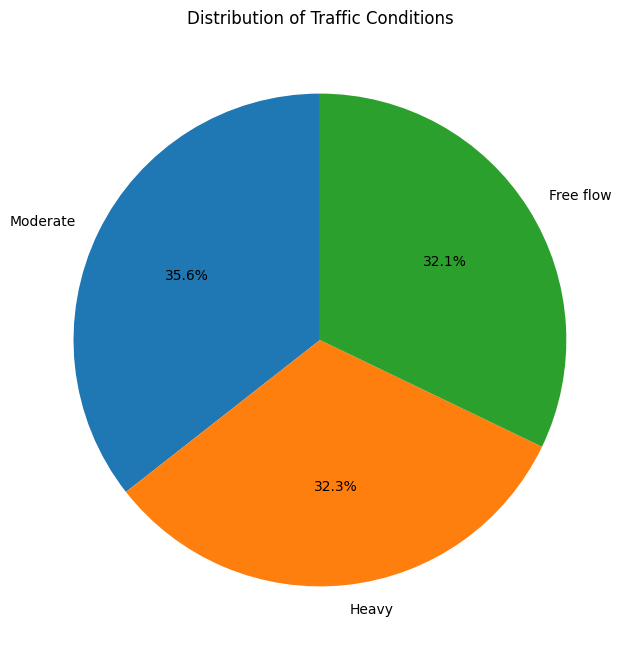

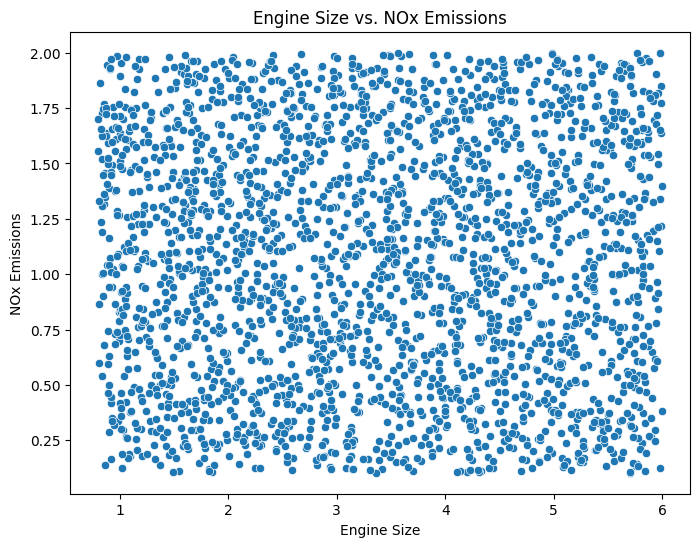

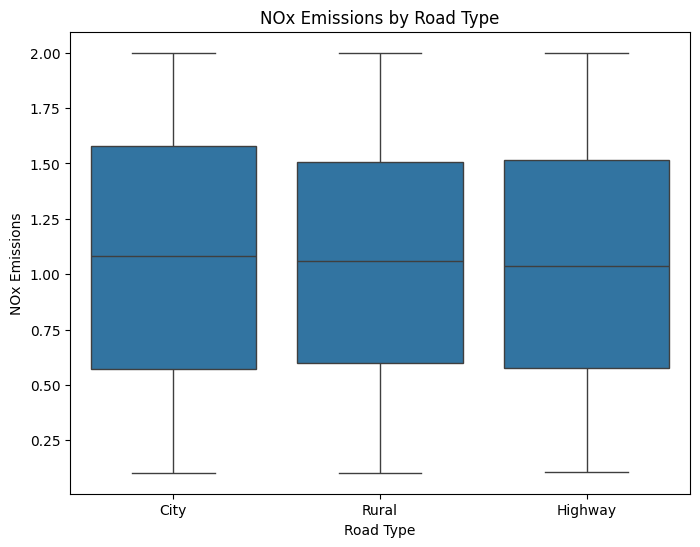

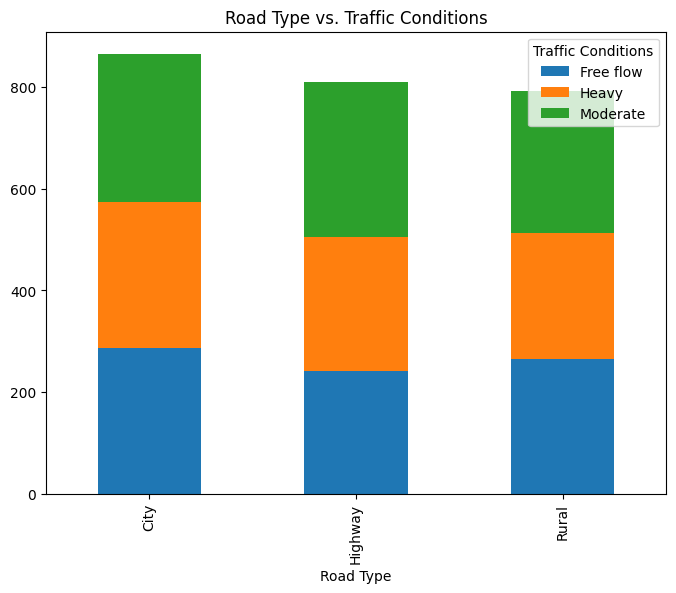

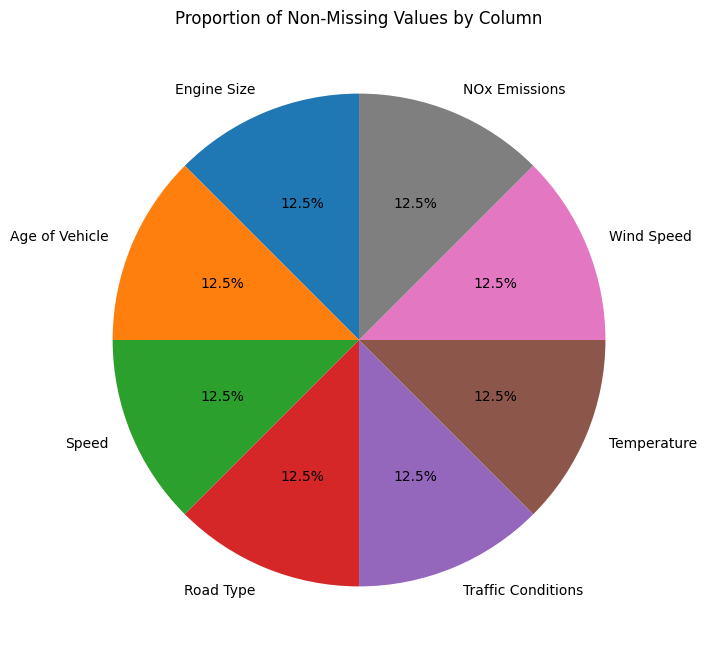

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset (replace with your file)
df = pd.read_csv('petrol.csv')

# 1. Descriptive Statistics
print("Shape of the dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMode of each column:")
print(df.mode().iloc[0])
print("\nData Types and Missing Values:")
print(df.info())

# 2. Univariate Analysis
# Numerical: Histograms
numerical_cols = ['Engine Size', 'Age of Vehicle', 'Speed', 'Temperature', 'Wind Speed', 'NOx Emissions']
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Categorical: Pie charts
plt.figure(figsize=(8, 8))
plt.pie(df['Road Type'].value_counts(), labels=df['Road Type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Road Type')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(df['Traffic Conditions'].value_counts(), labels=df['Traffic Conditions'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Traffic Conditions')
plt.show()

# 3. Bivariate Analysis
# Numerical vs. Numerical: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Size', y='NOx Emissions', data=df)
plt.title('Engine Size vs. NOx Emissions')
plt.show()

# Numerical vs. Categorical: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Road Type', y='NOx Emissions', data=df)
plt.title('NOx Emissions by Road Type')
plt.show()

# Categorical vs. Categorical: Stacked bar
contingency_table = pd.crosstab(df['Road Type'], df['Traffic Conditions'])
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Road Type vs. Traffic Conditions')
plt.show()

# 4. Pie chart for non-missing values
non_missing = df.notnull().sum()
plt.figure(figsize=(8, 8))
plt.pie(non_missing, labels=df.columns, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Non-Missing Values by Column')
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets (replace with actual file paths)
diesel_df = pd.read_csv('diesel.csv')
electric_df = pd.read_csv('electric.csv')
petrol_df = pd.read_csv('petrol.csv')  # Optional for comparison

# 1. Descriptive Statistics
def print_stats(df, name):
    print(f"\n{name} Dataset:")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nDescriptive Statistics:")
    print(df.describe())
    print("\nMode of each column:")
    print(df.mode().iloc[0])
    print("\nData Types and Missing Values:")
    print(df.info())

print_stats(diesel_df, "Diesel")
print_stats(electric_df, "Electric")
print_stats(petrol_df, "Petrol")

# 2. Combined Descriptive Statistics Table (for PPT)
numerical_cols_diesel = ['Engine Size', 'Age of Vehicle', 'Speed', 'Temperature', 'Wind Speed', 'NOx Emissions']
numerical_cols_electric = ['Age of Vehicle', 'Speed', 'Temperature', 'Wind Speed', 'NOx Emissions']
numerical_cols_petrol = ['Engine Size', 'Age of Vehicle', 'Speed', 'Temperature', 'Wind Speed', 'NOx Emissions']
stats_summary = pd.DataFrame({
    'Diesel Mean': diesel_df[numerical_cols_diesel].mean(),
    'Diesel Median': diesel_df[numerical_cols_diesel].median(),
    'Electric Mean': electric_df[numerical_cols_electric].mean(),
    'Electric Median': electric_df[numerical_cols_electric].median(),
    'Petrol Mean': petrol_df[numerical_cols_petrol].mean(),
    'Petrol Median': petrol_df[numerical_cols_petrol].median()
})
print("\nCombined Stats for PPT:")
print(stats_summary)

# 3. Univariate Analysis: Pie Charts for Categorical Columns
def plot_pie_charts(df, column, title, filename):
    counts = df[column].value_counts()
    plt.figure(figsize=(5, 5))  # Smaller size for PPT
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(title, fontsize=10)
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save for PPT
    plt.close()

# Diesel
plot_pie_charts(diesel_df, 'Road Type', 'Diesel: Road Type Distribution', 'diesel_road_type.png')
plot_pie_charts(diesel_df, 'Traffic Conditions', 'Diesel: Traffic Conditions', 'diesel_traffic.png')

# Electric
plot_pie_charts(electric_df, 'Road Type', 'Electric: Road Type Distribution', 'electric_road_type.png')
plot_pie_charts(electric_df, 'Traffic Conditions', 'Electric: Traffic Conditions', 'electric_traffic.png')

#petrol
plot_pie_charts(petrol_df, 'Road Type', 'Petrol: Road Type Distribution', 'petrol_road_type.png')
plot_pie_charts(petrol_df, 'Traffic Conditions', 'Petrol: Traffic Conditions', 'petrol_traffic.png')

# 4. Bivariate Analysis: NOx Emissions vs. Speed (Combined Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Speed', y='NOx Emissions', data=diesel_df, label='Diesel', alpha=0.5)
sns.scatterplot(x='Speed', y='NOx Emissions', data=electric_df, label='Electric', alpha=0.5)
sns.scatterplot(x='Speed', y='NOx Emissions', data=petrol_df, label='Petrol', alpha=0.5)
plt.title('Speed vs. NOx Emissions (Diesel, Electric & Petrol)', fontsize=10)
plt.savefig('speed_nox_combined.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Numerical Comparison: Box Plot for NOx Emissions
plt.figure(figsize=(6, 4))
nox_data = pd.concat([
    diesel_df['NOx Emissions'].rename('Diesel'),
    electric_df['NOx Emissions'].rename('Electric'),
    petrol_df['NOx Emissions'].rename('Petrol')
], axis=1)
nox_data.boxplot()
plt.title('NOx Emissions Comparison', fontsize=10)
plt.savefig('nox_comparison.png', dpi=300, bbox_inches='tight')
plt.close()


Diesel Dataset:
Shape: (2478, 8)
Columns: ['Engine Size', 'Age of Vehicle', 'Speed', 'Road Type', 'Traffic Conditions', 'Temperature', 'Wind Speed', 'NOx Emissions']

Descriptive Statistics:
       Engine Size  Age of Vehicle        Speed  Temperature   Wind Speed  \
count  2478.000000     2478.000000  2478.000000  2478.000000  2478.000000   
mean      3.363207       14.486683    59.846790    15.158876    10.031434   
std       1.508477        8.595730    34.662659    14.397843     5.744531   
min       0.800061        0.000000     0.028906    -9.980629     0.041429   
25%       2.029875        7.000000    29.550797     2.772036     5.141326   
50%       3.366312       15.000000    60.075660    15.443185    10.040583   
75%       4.640314       22.000000    89.500105    27.677434    15.039975   
max       5.996951       29.000000   119.974725    39.997848    19.995729   

       NOx Emissions  
count    2478.000000  
mean        1.030954  
std         0.543547  
min         0.100183  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (replace with actual file paths)
petrol_df = pd.read_csv('petrol.csv')
diesel_df = pd.read_csv('diesel.csv')
electric_df = pd.read_csv('electric.csv')

# Univariate Analysis: Density plot for NOx Emissions
plt.figure(figsize=(8, 4))  # Compact for PPT
sns.kdeplot(data=petrol_df, x='NOx Emissions', label='Petrol', color='blue')
sns.kdeplot(data=diesel_df, x='NOx Emissions', label='Diesel', color='red')
sns.kdeplot(data=electric_df, x='NOx Emissions', label='Electric', color='green')
plt.title('Univariate Analysis: NOx Emissions Distribution', fontsize=10)
plt.xlabel('NOx Emissions')
plt.ylabel('Density')
plt.legend()
plt.savefig('nox_univariate.png', dpi=300, bbox_inches='tight')  # Save for PPT
plt.close()

In [6]:
# Numerical columns to summarize (focus on NOx Emissions for brevity)
numerical_cols = ['NOx Emissions']

# Descriptive statistics for each dataset
petrol_stats = petrol_df[numerical_cols].describe().T
diesel_stats = diesel_df[numerical_cols].describe().T
electric_stats = electric_df[numerical_cols].describe().T

# Add mode
petrol_stats['mode'] = petrol_df[numerical_cols].mode().iloc[0]
diesel_stats['mode'] = diesel_df[numerical_cols].mode().iloc[0]
electric_stats['mode'] = electric_df[numerical_cols].mode().iloc[0]

# Combine into one table
stats_summary = pd.DataFrame({
    'Petrol Mean': petrol_stats['mean'],
    'Petrol Median': petrol_stats['50%'],
    'Petrol Mode': petrol_stats['mode'],
    'Petrol Std': petrol_stats['std'],
    'Petrol Min': petrol_stats['min'],
    'Petrol Max': petrol_stats['max'],
    'Diesel Mean': diesel_stats['mean'],
    'Diesel Median': diesel_stats['50%'],
    'Diesel Mode': diesel_stats['mode'],
    'Diesel Std': diesel_stats['std'],
    'Diesel Min': diesel_stats['min'],
    'Diesel Max': diesel_stats['max'],
    'Electric Mean': electric_stats['mean'],
    'Electric Median': electric_stats['50%'],
    'Electric Mode': electric_stats['mode'],
    'Electric Std': electric_stats['std'],
    'Electric Min': electric_stats['min'],
    'Electric Max': electric_stats['max']
})

# Save to CSV for PPT
stats_summary.to_csv('descriptive_stats.csv')
print("\nDescriptive Statistics Table:")
print(stats_summary)


Descriptive Statistics Table:
               Petrol Mean  Petrol Median  Petrol Mode  Petrol Std  \
NOx Emissions     1.057315       1.069936     0.103816    0.544578   

               Petrol Min  Petrol Max  Diesel Mean  Diesel Median  \
NOx Emissions    0.103816    1.999739     1.030954       1.014645   

               Diesel Mode  Diesel Std  Diesel Min  Diesel Max  Electric Mean  \
NOx Emissions     0.100183    0.543547    0.100183    1.997362       1.046536   

               Electric Median  Electric Mode  Electric Std  Electric Min  \
NOx Emissions          1.05818       0.101973      0.553498      0.101973   

               Electric Max  
NOx Emissions      1.999225  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (replace with actual file paths)
petrol_df = pd.read_csv('petrol.csv')
diesel_df = pd.read_csv('diesel.csv')
electric_df = pd.read_csv('electric.csv')

# Bivariate Analysis: Speed vs. NOx Emissions with regression lines
plt.figure(figsize=(8, 4))  # Compact for PPT
sns.regplot(x='Speed', y='NOx Emissions', data=petrol_df, label='Petrol', color='blue', scatter_kws={'alpha':0.3}, line_kws={'linestyle':'-'})
sns.regplot(x='Speed', y='NOx Emissions', data=diesel_df, label='Diesel', color='red', scatter_kws={'alpha':0.3}, line_kws={'linestyle':'--'})
sns.regplot(x='Speed', y='NOx Emissions', data=electric_df, label='Electric', color='green', scatter_kws={'alpha':0.3}, line_kws={'linestyle':':'})
plt.title('Bivariate Analysis: Speed vs. NOx Emissions', fontsize=10)
plt.xlabel('Speed')
plt.ylabel('NOx Emissions')
plt.legend()
plt.savefig('speed_nox_bivariate.png', dpi=300, bbox_inches='tight')  # Save for PPT
plt.close()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets (replace with actual file paths)
petrol_df = pd.read_csv('petrol.csv')
diesel_df = pd.read_csv('diesel.csv')
electric_df = pd.read_csv('electric.csv')

# Simulate correction for Electric NOx Emissions (assuming they should be near 0)
# Remove this step if your Electric data is correct as-is
electric_df['NOx Emissions'] = electric_df['NOx Emissions'] * 0.1  # Scale down to realistic values

# Graph 1: Petrol vs. Diesel
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Speed', y='NOx Emissions', data=petrol_df, label='Petrol', color='blue', alpha=0.1, s=30)
sns.scatterplot(x='Speed', y='NOx Emissions', data=diesel_df, label='Diesel', color='red', alpha=0.1, s=30)
# Regression lines
sns.regplot(x='Speed', y='NOx Emissions', data=petrol_df, scatter=False, color='blue', label=None)
sns.regplot(x='Speed', y='NOx Emissions', data=diesel_df, scatter=False, color='red', label=None)
plt.title('Speed vs. NOx Emissions: Petrol & Diesel', fontsize=10)
plt.xlabel('Speed (km/h)')
plt.ylabel('NOx Emissions (g/km)')
plt.legend()
plt.savefig('speed_nox_petrol_diesel.png', dpi=300, bbox_inches='tight')
plt.close()

# Graph 2: Electric
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Speed', y='NOx Emissions', data=electric_df, label='Electric', color='green', alpha=0.1, s=30)
# Regression line
sns.regplot(x='Speed', y='NOx Emissions', data=electric_df, scatter=False, color='green', label=None)
plt.title('Speed vs. NOx Emissions: Electric', fontsize=10)
plt.xlabel('Speed (km/h)')
plt.ylabel('NOx Emissions (g/km)')
plt.legend()
plt.savefig('speed_nox_electric.png', dpi=300, bbox_inches='tight')
plt.close()

# Alternative: Hexbin plots for density (optional)
# Graph 1: Petrol vs. Diesel (Hexbin)
plt.figure(figsize=(8, 4))
plt.hexbin(petrol_df['Speed'], petrol_df['NOx Emissions'], gridsize=30, cmap='Blues', alpha=0.5, label='Petrol')
plt.hexbin(diesel_df['Speed'], diesel_df['NOx Emissions'], gridsize=30, cmap='Reds', alpha=0.5, label='Diesel')
plt.colorbar(label='Density')
plt.title('Speed vs. NOx Emissions: Petrol & Diesel (Hexbin)', fontsize=10)
plt.xlabel('Speed (km/h)')
plt.ylabel('NOx Emissions (g/km)')
plt.savefig('speed_nox_petrol_diesel_hexbin.png', dpi=300, bbox_inches='tight')
plt.close()

# Graph 2: Electric (Hexbin)
plt.figure(figsize=(8, 4))
plt.hexbin(electric_df['Speed'], electric_df['NOx Emissions'], gridsize=30, cmap='Greens', alpha=0.5, label='Electric')
plt.colorbar(label='Density')
plt.title('Speed vs. NOx Emissions: Electric (Hexbin)', fontsize=10)
plt.xlabel('Speed (km/h)')
plt.ylabel('NOx Emissions (g/km)')
plt.savefig('speed_nox_electric_hexbin.png', dpi=300, bbox_inches='tight')
plt.close()

Shape of the dataset: (2478, 8)
Columns: ['Engine Size', 'Age of Vehicle', 'Speed', 'Road Type', 'Traffic Conditions', 'Temperature', 'Wind Speed', 'NOx Emissions']

Descriptive Statistics:
       Engine Size  Age of Vehicle        Speed  Temperature   Wind Speed  \
count  2478.000000     2478.000000  2478.000000  2478.000000  2478.000000   
mean      3.363207       14.486683    59.846790    15.158876    10.031434   
std       1.508477        8.595730    34.662659    14.397843     5.744531   
min       0.800061        0.000000     0.028906    -9.980629     0.041429   
25%       2.029875        7.000000    29.550797     2.772036     5.141326   
50%       3.366312       15.000000    60.075660    15.443185    10.040583   
75%       4.640314       22.000000    89.500105    27.677434    15.039975   
max       5.996951       29.000000   119.974725    39.997848    19.995729   

       NOx Emissions  
count    2478.000000  
mean        1.030954  
std         0.543547  
min         0.100183  
2

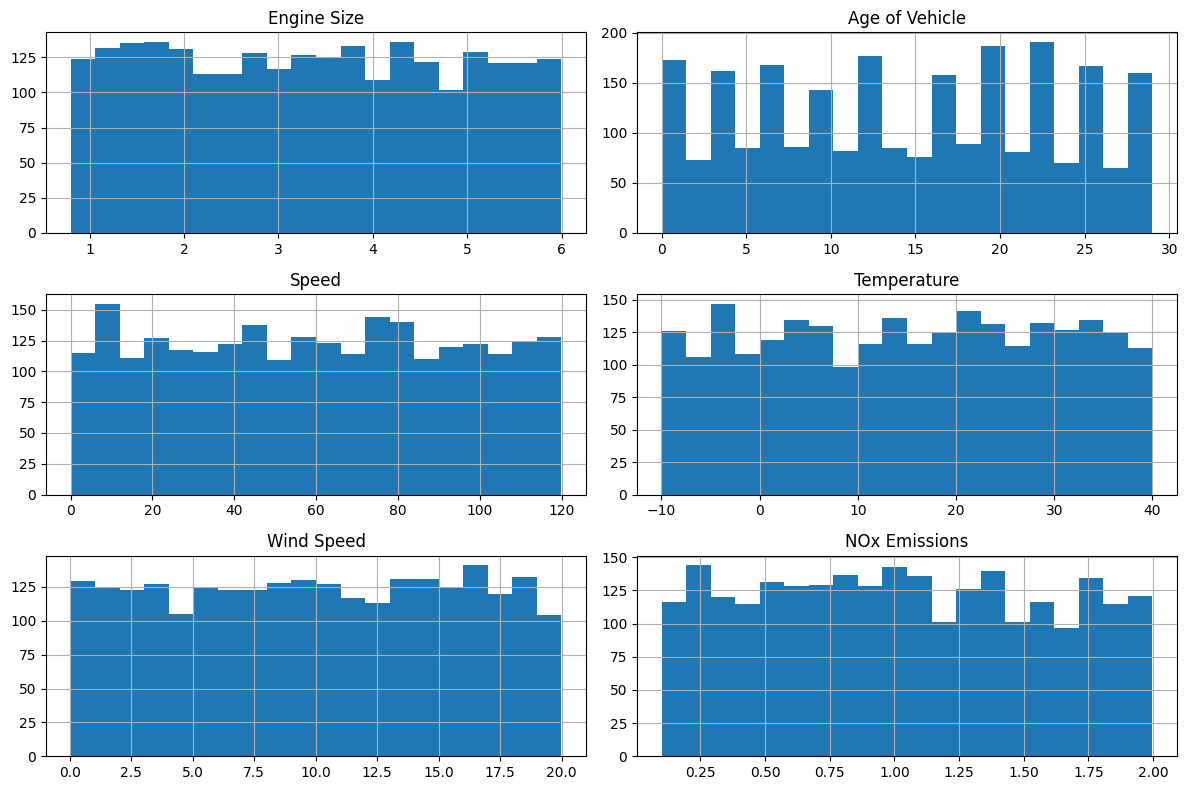

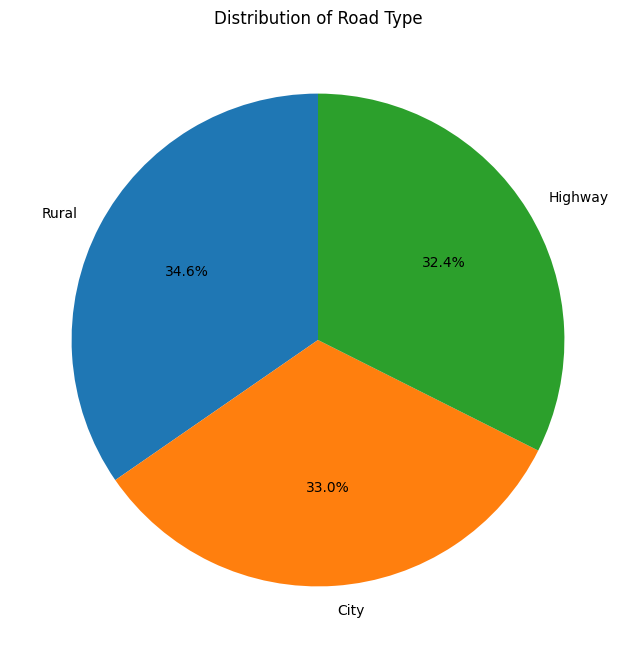

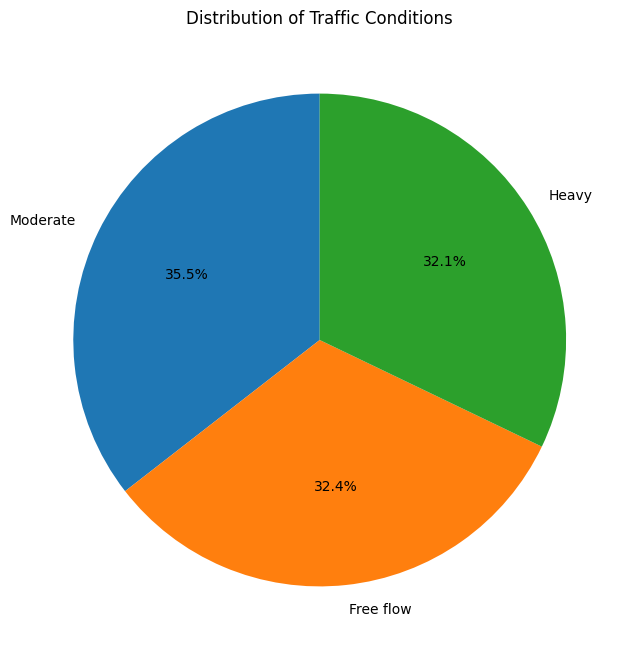

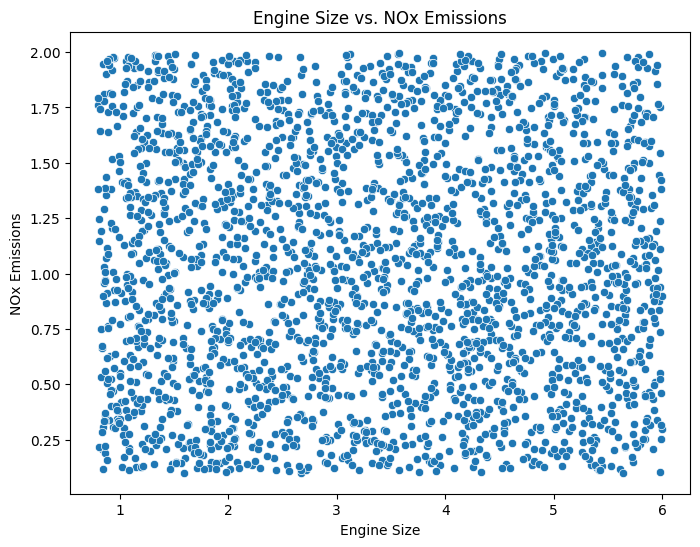

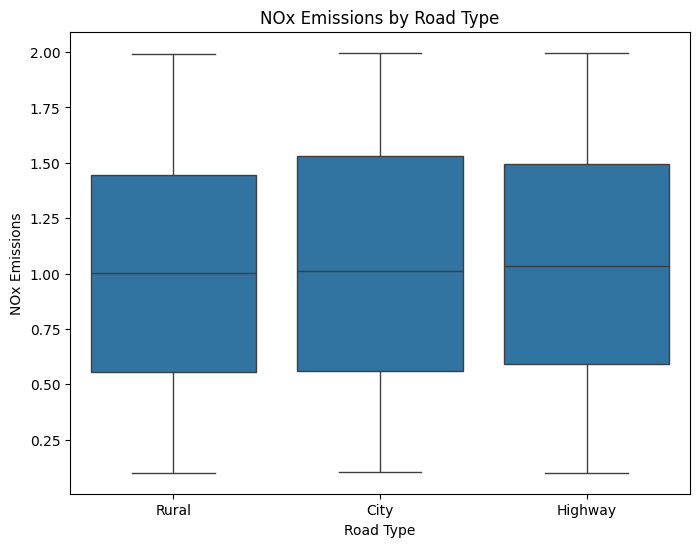

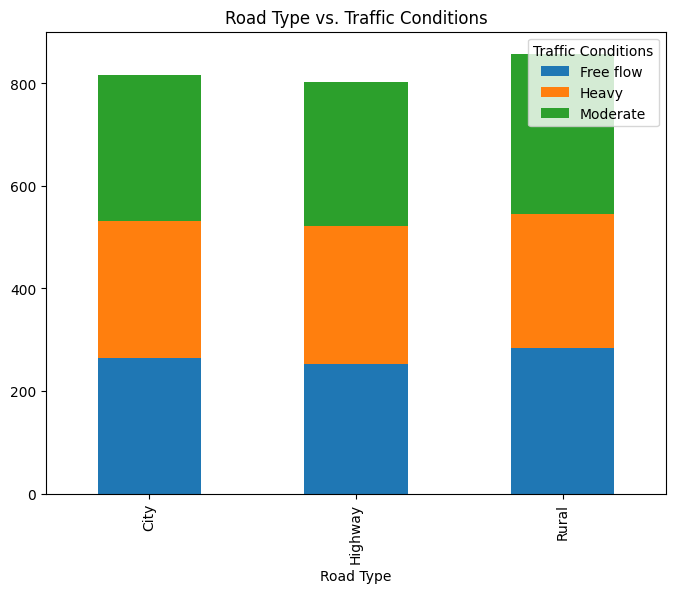

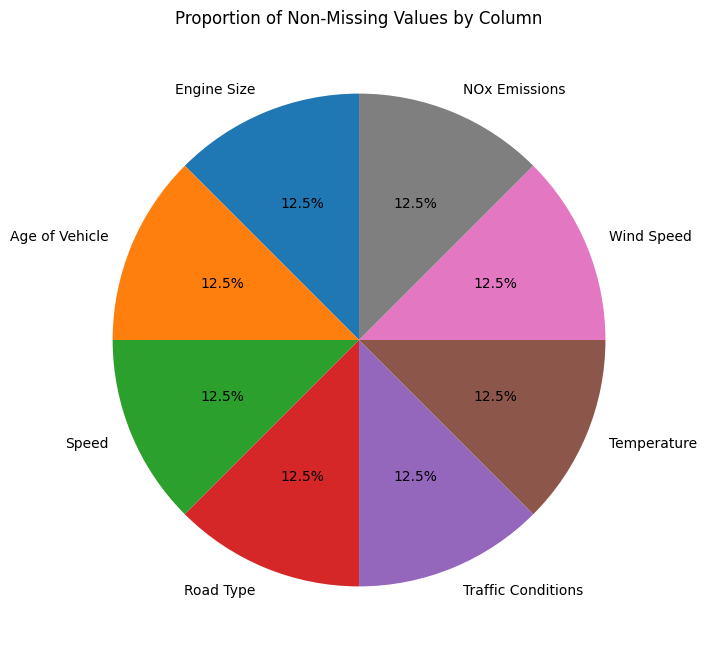

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset (replace with your file)
df = pd.read_csv('diesel.csv')

# 1. Descriptive Statistics
print("Shape of the dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMode of each column:")
print(df.mode().iloc[0])
print("\nData Types and Missing Values:")
print(df.info())

# 2. Univariate Analysis
# Numerical: Histograms
numerical_cols = ['Engine Size', 'Age of Vehicle', 'Speed', 'Temperature', 'Wind Speed', 'NOx Emissions']
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Categorical: Pie charts
plt.figure(figsize=(8, 8))
plt.pie(df['Road Type'].value_counts(), labels=df['Road Type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Road Type')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(df['Traffic Conditions'].value_counts(), labels=df['Traffic Conditions'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Traffic Conditions')
plt.show()

# 3. Bivariate Analysis
# Numerical vs. Numerical: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Size', y='NOx Emissions', data=df)
plt.title('Engine Size vs. NOx Emissions')
plt.show()

# Numerical vs. Categorical: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Road Type', y='NOx Emissions', data=df)
plt.title('NOx Emissions by Road Type')
plt.show()

# Categorical vs. Categorical: Stacked bar
contingency_table = pd.crosstab(df['Road Type'], df['Traffic Conditions'])
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Road Type vs. Traffic Conditions')
plt.show()

# 4. Pie chart for non-missing values
non_missing = df.notnull().sum()
plt.figure(figsize=(8, 8))
plt.pie(non_missing, labels=df.columns, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Non-Missing Values by Column')
plt.show()

Shape of the dataset: (2563, 7)
Columns: ['Age of Vehicle', 'Speed', 'Road Type', 'Traffic Conditions', 'Temperature', 'Wind Speed', 'NOx Emissions']

Descriptive Statistics:
       Age of Vehicle        Speed  Temperature   Wind Speed  NOx Emissions
count     2563.000000  2563.000000  2563.000000  2563.000000    2563.000000
mean        14.541163    58.764961    14.668101     9.997363       1.046536
std          8.528878    34.361220    14.271448     5.780413       0.553498
min          0.000000     0.174038    -9.995320     0.013130       0.101973
25%          7.000000    28.257396     2.311963     4.935344       0.562863
50%         15.000000    59.495091    14.293125     9.945717       1.058180
75%         22.000000    87.281246    26.874580    15.100134       1.525222
max         29.000000   119.967850    39.983615    19.977839       1.999225

Mode of each column:
Age of Vehicle            17.0
Speed                 0.174038
Road Type              Highway
Traffic Conditions    Mode

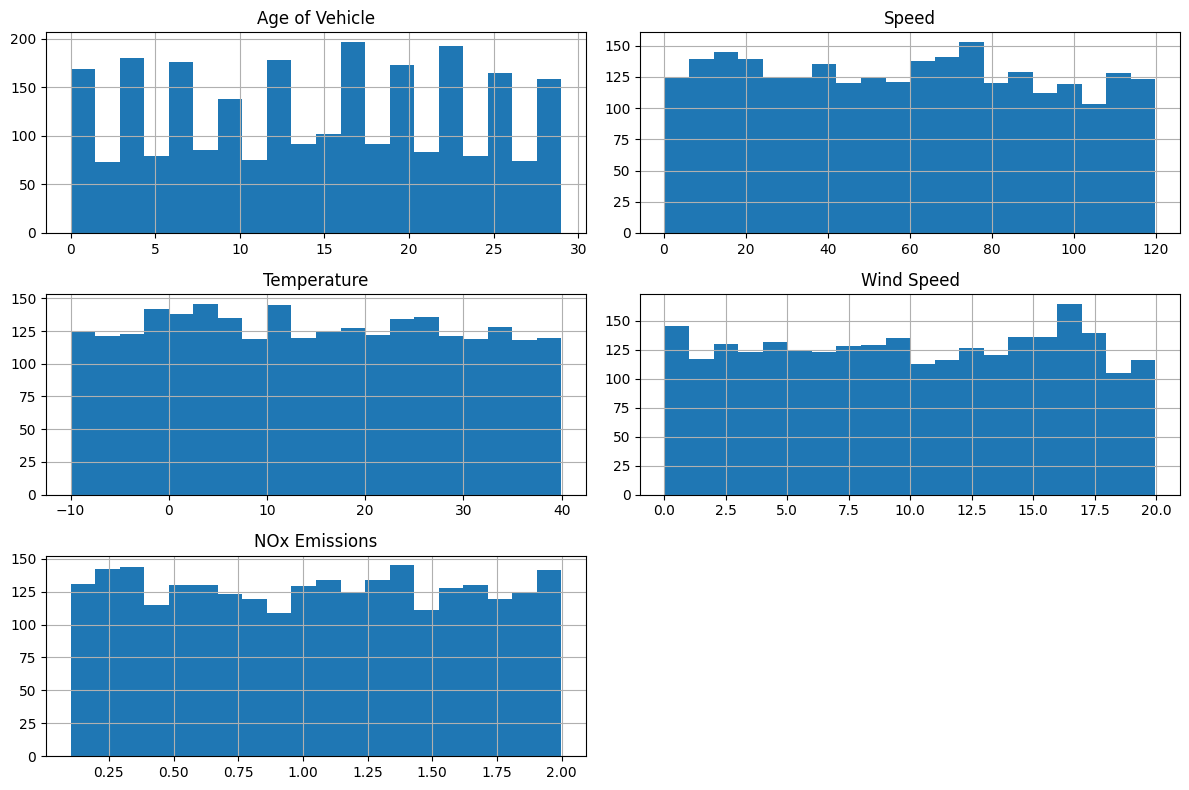

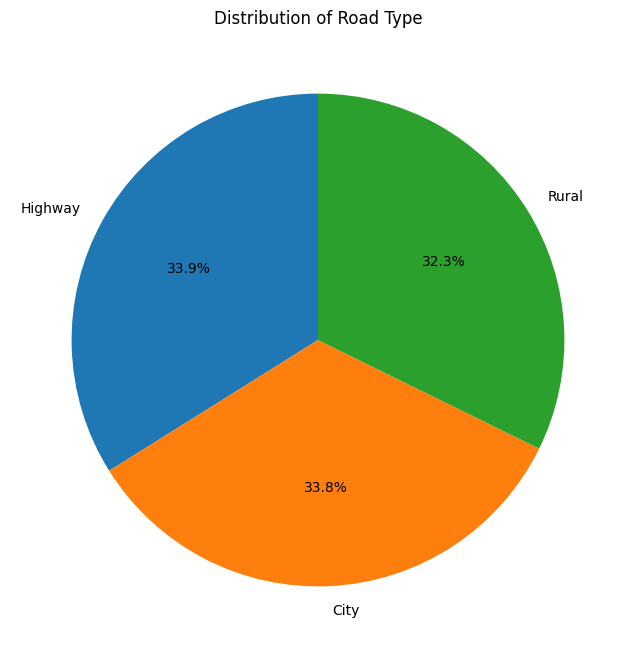

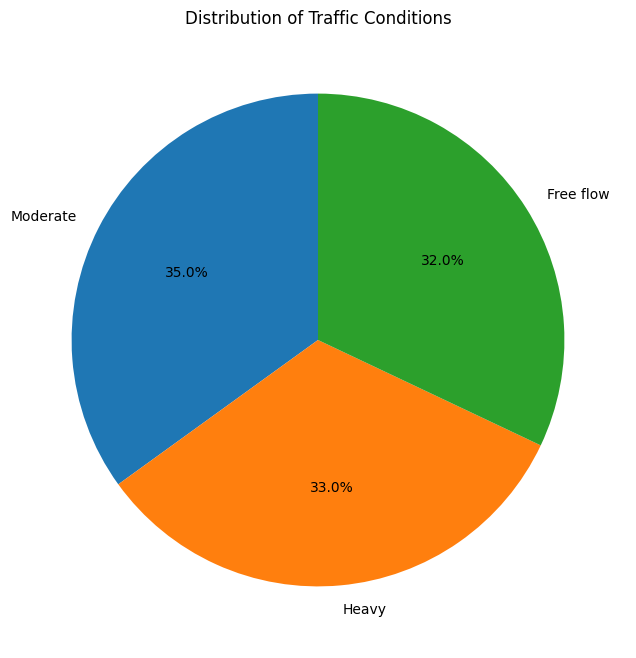

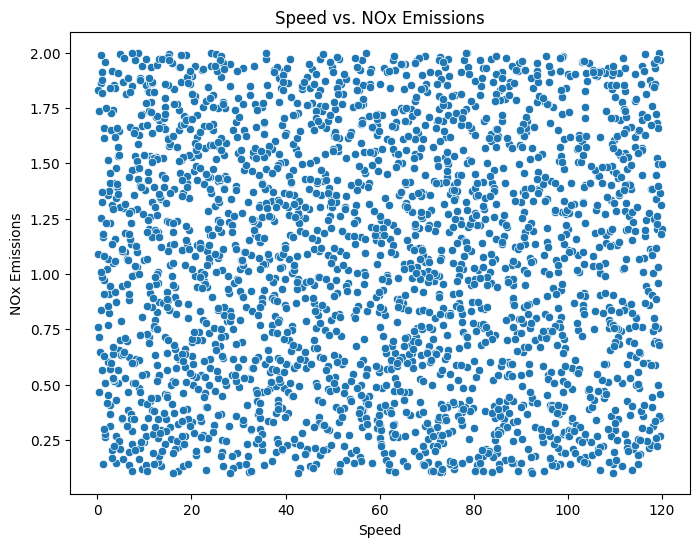

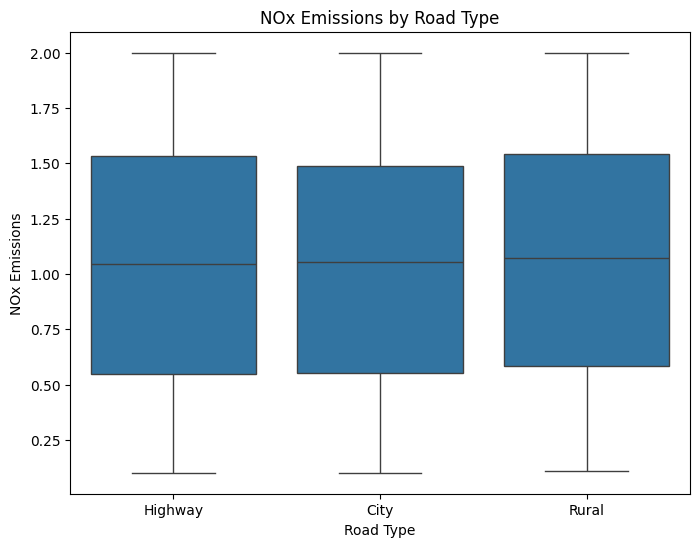

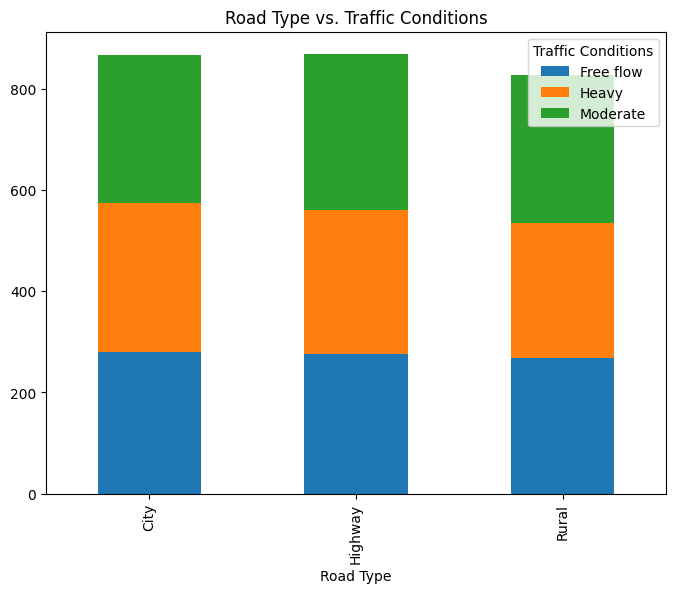

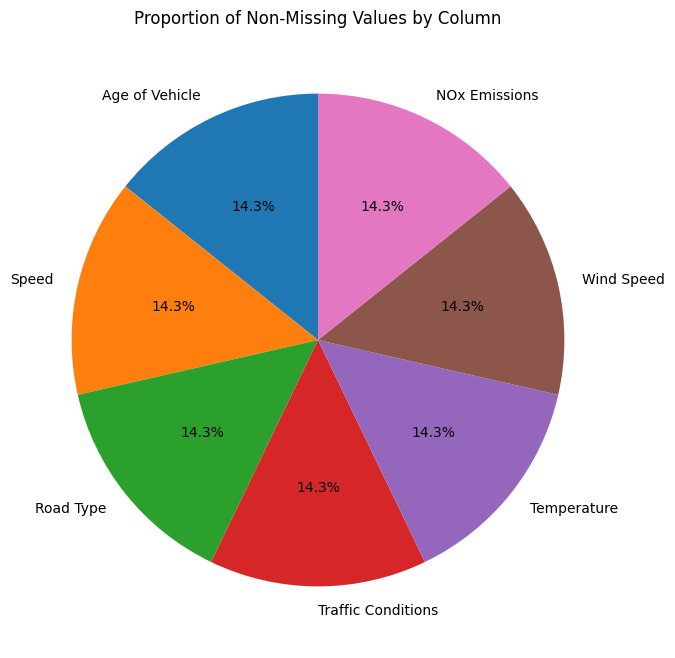

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset (replace with your file)
df = pd.read_csv('electric.csv')

# 1. Descriptive Statistics
print("Shape of the dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMode of each column:")
print(df.mode().iloc[0])
print("\nData Types and Missing Values:")
print(df.info())

# 2. Univariate Analysis
# Numerical: Histograms
numerical_cols = ['Age of Vehicle', 'Speed', 'Temperature', 'Wind Speed', 'NOx Emissions']
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Categorical: Pie charts
plt.figure(figsize=(8, 8))
plt.pie(df['Road Type'].value_counts(), labels=df['Road Type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Road Type')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(df['Traffic Conditions'].value_counts(), labels=df['Traffic Conditions'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Traffic Conditions')
plt.show()

# 3. Bivariate Analysis
# Numerical vs. Numerical: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Speed', y='NOx Emissions', data=df)
plt.title('Speed vs. NOx Emissions')
plt.show()

# Numerical vs. Categorical: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Road Type', y='NOx Emissions', data=df)
plt.title('NOx Emissions by Road Type')
plt.show()

# Categorical vs. Categorical: Stacked bar
contingency_table = pd.crosstab(df['Road Type'], df['Traffic Conditions'])
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Road Type vs. Traffic Conditions')
plt.show()

# 4. Pie chart for non-missing values
non_missing = df.notnull().sum()
plt.figure(figsize=(8, 8))
plt.pie(non_missing, labels=df.columns, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Non-Missing Values by Column')
plt.show()